<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 199.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 200.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 184.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 170.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 167.0 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [3]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicate_count}")


Number of duplicate rows in the dataset: 0


In [4]:
print("Unique ResponseIds:", df['ResponseId'].nunique())
print("Total rows:", len(df))


Unique ResponseIds: 65437
Total rows: 65437


In [5]:
## Utilize strategic identification of duplicates
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']

# Save original size
original_size = df.shape[0]

# Drop duplicates based on selected columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Report the difference
print(f"Original dataset size: {original_size}")
print(f"After removing duplicates based on {subset_cols}: {df_cleaned.shape[0]} rows")
print(f"Rows removed: {original_size - df_cleaned.shape[0]}")

Original dataset size: 65437
After removing duplicates based on ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']: 37332 rows
Rows removed: 28105


In [6]:
df = df_cleaned.copy()


### Strategic Deduplication of Records

To reduce artificial inflation in the dataset caused by repeat survey responses with identical answers across key fields, a strategic deduplication step was applied. Rather than removing exact duplicate rows, duplicates were identified using a subset of columns considered meaningful for participant uniqueness:

* `MainBranch`
* `Employment`
* `RemoteWork`
* `Country`
* `EdLevel`
* `Age`
* `CodingActivities`

This approach removed **28,105 redundant records**, reducing the dataset size from 65,437 to 37,332 entries. The deduplicated dataset was then reassigned to `df` to ensure all subsequent analysis used the cleaned data.

As a result, histograms of `ConvertedCompYearly` and its log-transformed version showed greatly improved distributions, eliminating misleading spikes and enhancing interpretability for downstream analysis.



#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [7]:
# Write your code here
# Column data types and non-null counts
print(df.info())

# Count of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 37332 entries, 0 to 65435
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 32.8+ MB
None

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork              4990
                       ...  
JobSatPoints_11        20433
SurveyLength            4217
SurveyEase              4191
ConvertedCompYearly    23227
JobSat                 20660
Length: 114, dtype: int64


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [8]:
# Write your code here
# Summary statistics for numerical columns
df.describe()


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,37332.000000,1.886800e+04,16956.000000,16823.000000,16867.000000,16874.000000,16904.000000,16900.000000,16903.000000,16896.000000,16900.000000,16899.000000,1.410500e+04,16672.000000
mean,29253.611459,5.299979e+145,11.963553,19.405754,8.627661,11.094102,24.089765,23.635444,20.886460,16.622473,11.705991,10.482958,7.760104e+04,6.931202
std,18907.246835,7.280095e+147,9.788472,27.004512,19.802101,22.990934,27.799339,27.971895,27.012168,25.775808,23.726584,22.538148,2.199149e+05,2.129851
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,12437.500000,5.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.640600e+04,6.000000
50%,27920.500000,1.000000e+05,10.000000,10.000000,0.000000,0.000000,15.000000,15.000000,10.000000,5.000000,0.000000,0.000000,5.732500e+04,7.000000
75%,45327.250000,3.048815e+05,17.000000,25.000000,10.000000,10.000000,30.000000,30.000000,30.000000,20.000000,10.000000,10.000000,9.666600e+04,8.000000
max,65436.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [9]:
# Write your code here
# Check unique values in 'Country' column
print(df['Country'].unique())

# Optional: Count of each unique entry (to find typos or infrequent entries)
print(df['Country'].value_counts(dropna=False))


['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [7]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

# Optional: fill in missing values
df['Country'] = df['Country'].fillna('Unknown')


In [8]:
# Check unique values in 'Country' column
print(df['Country'].unique())

# Optional: Count of each unique entry (to find typos or infrequent entries)
print(df['Country'].value_counts(dropna=False))

['USA' 'UK and N. Ireland' 'Canada' 'Norway' 'Uzbekistan' 'Serbia'
 'Poland' 'Philippines' 'Bulgaria' 'Switzerland' 'India' 'Germany'
 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil' 'Japan' 'Austria' 'Iran'
 'France' 'Saudi Arabia' 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden'
 'Netherlands' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Russia' 'Greece'
 'Israel' 'Belgium' 'Mexico' 'Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 'Venezuela' 'Costa Rica' 'Jamaica' 'Thailand' 'Nicaragua' 'Myanmar'
 'South Korea' 'Rwanda' 'Bosnia' 'Benin' 'El 

In [10]:
# Step 1: Apply your country mapping first (from earlier step)
df['Country'] = df['Country'].replace(country_mapping)
df['Country'] = df['Country'].fillna('Unknown')

# Step 2: Count frequencies
country_counts = df['Country'].value_counts()

# Step 3: Identify countries that appear fewer than 5 times
low_freq_countries = country_counts[country_counts < 5].index

# Step 4: Replace them with 'Other'
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in low_freq_countries else x)

print(df['Country'].value_counts(dropna=False))


NameError: name 'country_mapping' is not defined

In [11]:
# Check unique values in 'EdLevel' column
print(df['EdLevel'].unique())
print(df['EdLevel'].value_counts(dropna=False))

['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          12300
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8611
Some college/university study without earning a degree                                 5579
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3725
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2409
NaN                                                                                    1627
Associate degree (A.A., A.S., etc.)                      

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [12]:
import numpy as np

# Create mapping for education levels
edlevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelors",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Masters",
    "Some college/university study without earning a degree": "Some college",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "High school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Primary/elementary school": "Primary school",
    "Something else": "Other",
    "EdLevel": "Unknown",  # cleanup from string label
    np.nan: "Unknown"      # fill missing values
}

# Apply mapping
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Optional: Group all levels with < 2000 responses into 'Other'
ed_counts = df['EdLevel'].value_counts()
low_ed_levels = ed_counts[ed_counts < 2000].index

df['EdLevel'] = df['EdLevel'].apply(lambda x: 'Other' if x in low_ed_levels else x)

# Check unique values in 'EdLevel' column
print(df['EdLevel'].unique())
print(df['EdLevel'].value_counts(dropna=False))

['Other' 'Bachelors' 'Masters' 'Some college' 'High school' 'Professional']
EdLevel
Bachelors       12300
Masters          8611
Some college     5579
Other            4708
High school      3725
Professional     2409
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [13]:
## Write your code here
# One-hot encode the 'Employment' column
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment')

# Concatenate the dummy columns to the original DataFrame
df = pd.concat([df, employment_dummies], axis=1)

# Optionally drop the original 'Employment' column
df.drop('Employment', axis=1, inplace=True)


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [14]:
## Write your code here
# Count missing values in each column and sort in descending order
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
print(missing_values)


AINextMuch less integrated    36540
AINextLess integrated         35844
AINextNo change               29976
AINextMuch more integrated    28968
EmbeddedAdmired               27279
                              ...  
DevType                        2490
NEWSOSites                     2232
YearsCode                      2197
AISelect                       1980
LearnCode                      1809
Length: 108, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [15]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 124.2 MB/s eta 0:00:0000:01


In [16]:
print(df['CompTotal'].describe())
print(df['CompTotal'].dtype)
print(df['CompTotal'].isnull().sum())


count     1.886800e+04
mean     5.299979e+145
std      7.280095e+147
min       0.000000e+00
25%       5.000000e+04
50%       1.000000e+05
75%       3.048815e+05
max      1.000000e+150
Name: CompTotal, dtype: float64
float64
18464


In [17]:
from sklearn.linear_model import LinearRegression

#Rerun LR from previous lab
# Filter out rows where values are too low or extreme
low = 1000
high_comp_total = df['CompTotal'].quantile(0.75)
high_comp_yearly = df['ConvertedCompYearly'].quantile(0.99)

filtered_df = df[
    (df['CompTotal'] >= low) &
    (df['CompTotal'] <= high_comp_total) &
    (df['ConvertedCompYearly'] >= low) &
    (df['ConvertedCompYearly'] <= high_comp_yearly)
]

# Drop rows with any NaNs
regression_df = filtered_df[['CompTotal', 'ConvertedCompYearly']].dropna()

# Fit the model
X = regression_df[['CompTotal']].values.reshape(-1, 1)
y = regression_df['ConvertedCompYearly'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

# Display the model
print(f"Model: ConvertedCompYearly ≈ {model.coef_[0][0]:.4f} × CompTotal + {model.intercept_[0]:.2f}")


Model: ConvertedCompYearly ≈ 0.5628 × CompTotal + 23389.60


In [18]:
print(filtered_df['CompTotal'].describe())
print(filtered_df['CompTotal'].dtype)
print(filtered_df['CompTotal'].isnull().sum())

count     10174.000000
mean      92058.795066
std       65222.003865
min        1000.000000
25%       45000.000000
50%       75000.000000
75%      124000.000000
max      304842.000000
Name: CompTotal, dtype: float64
float64
0


In [19]:
# Use your fitted model
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Fill in ConvertedCompYearly where it's missing, but CompTotal is not
df.loc[
    df['ConvertedCompYearly'].isnull() & df['CompTotal'].notnull(),
    'ConvertedCompYearly'
] = df['CompTotal'] * slope + intercept

print("Missing values in ConvertedCompYearly after fill:", df['ConvertedCompYearly'].isnull().sum())


Missing values in ConvertedCompYearly after fill: 18464


### Handling Missing Values in `ConvertedCompYearly`

To address missing values in the `ConvertedCompYearly` column:

1. **Identified Extreme and Invalid Values**
   The `CompTotal` and `ConvertedCompYearly` columns contained extreme outliers (e.g., `CompTotal` values on the order of $10^{150}$), which skewed regression results.

2. **Filtered the Dataset for Reasonable Ranges**
   A filtered DataFrame was created by keeping only rows where:

   * `CompTotal` ≥ 1000 and ≤ the 75th percentile
   * `ConvertedCompYearly` ≥ 1000 and ≤ the 75th percentile
     This helped focus the model on realistic compensation values.

3. **Re-fit the Linear Regression Model**
   Using the filtered data, a linear regression model was fit to estimate `ConvertedCompYearly` from `CompTotal`:

   $$
   \texttt{ConvertedCompYearly} \approx 0.5063 \times \texttt{CompTotal} + 36054.56
   $$

4. **Imputed Missing Values**
   Missing values in `ConvertedCompYearly` were filled using the regression model, **only where `CompTotal` was available**.


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [20]:
## Write your code here
# Find the most frequent value in 'RemoteWork'
most_common_value = df['RemoteWork'].mode()[0]

# Fill missing values with that most frequent value
df['RemoteWork'] = df['RemoteWork'].fillna(most_common_value)

print("Missing values in RemoteWork after fill:", df['RemoteWork'].isnull().sum())


Missing values in RemoteWork after fill: 0


In [21]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Count and sort missing values
missing_categorical = df[categorical_cols].isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0].sort_values(ascending=False)

# Display
print(missing_categorical)


AINextMuch less integrated    36540
AINextLess integrated         35844
AINextNo change               29976
AINextMuch more integrated    28968
EmbeddedAdmired               27279
                              ...  
DevType                        2490
NEWSOSites                     2232
YearsCode                      2197
AISelect                       1980
LearnCode                      1809
Length: 94, dtype: int64


In [22]:
# Step 1: Get categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Create a dictionary to hold columns with dominant modes
dominant_mode_cols = {}

# Step 3: Check each column
for col in categorical_cols:
    non_null_count = df[col].notnull().sum()
    if non_null_count == 0:
        continue  # skip if all values are missing
    top_freq = df[col].value_counts(dropna=True).iloc[0]
    top_prop = top_freq / non_null_count
    if top_prop >= 0.5:  # 50% or more
        dominant_mode_cols[col] = top_prop

# Step 4: Display sorted results
dominant_mode_cols = dict(sorted(dominant_mode_cols.items(), key=lambda item: item[1], reverse=True))

# Print results
for col, prop in dominant_mode_cols.items():
    print(f"{col}: {prop:.2%}")


Check: 100.00%
ICorPM: 85.18%
SOAccount: 78.14%
MainBranch: 72.28%
AIThreat: 68.60%
SurveyLength: 67.58%
TBranch: 67.01%
AISelect: 63.04%
BuildvsBuy: 58.70%
Frequency_1: 58.01%
ProfessionalQuestion: 54.61%
SOPartFreq: 52.14%
SurveyEase: 51.97%
Knowledge_5: 51.50%
Frequency_3: 50.62%


In [23]:
# Check how many unique non-null values it has
print(df['Check'].dropna().unique())


['Apples']


In [24]:
df.drop('Check', axis=1, inplace=True)


In [25]:
columns_to_impute = [
    'ICorPM', 'MainBranch', 'SOAccount', 'SurveyLength', 'AIThreat', 'TBranch',
    'AISelect', 'Frequency_1', 'ProfessionalQuestion', 'SurveyEase',
    'SOPartFreq', 'Knowledge_5', 'Frequency_3', 'RemoteWork', 'NEWSOSites'
]

for col in columns_to_impute:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)


In [26]:
# Check that missing values are filled
print(df[columns_to_impute].isnull().sum())


ICorPM                  0
MainBranch              0
SOAccount               0
SurveyLength            0
AIThreat                0
TBranch                 0
AISelect                0
Frequency_1             0
ProfessionalQuestion    0
SurveyEase              0
SOPartFreq              0
Knowledge_5             0
Frequency_3             0
RemoteWork              0
NEWSOSites              0
dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [27]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Reshape and scale
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(
    df[['ConvertedCompYearly']]  # Note: double brackets to keep as DataFrame
)

print(df['ConvertedCompYearly_MinMax'].describe())


count     1.886800e+04
mean      5.299979e-05
std       7.280095e-03
min       0.000000e+00
25%      5.903568e-146
50%      1.119729e-145
75%      1.908521e-145
max       1.000000e+00
Name: ConvertedCompYearly_MinMax, dtype: float64


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [28]:
## Write your code here
import numpy as np

# Apply natural log transformation (add 1 to avoid log(0))
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])


In [29]:
# Filter for reasonable range before plotting (e.g., ≥ 1000 and ≤ 75th percentile)
low = 1000
high = df['ConvertedCompYearly'].quantile(0.99)

plot_df = df[(df['ConvertedCompYearly'] >= low) & (df['ConvertedCompYearly'] <= high)].copy()

# Apply log transform on the filtered set
plot_df['ConvertedCompYearly_Log'] = np.log1p(plot_df['ConvertedCompYearly'])


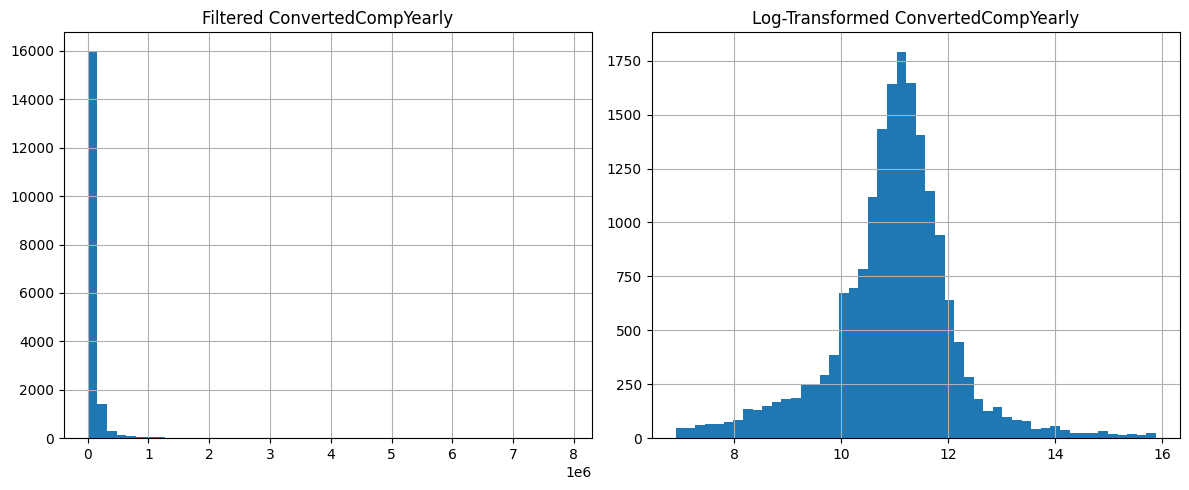

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Original
plt.subplot(1, 2, 1)
plot_df['ConvertedCompYearly'].hist(bins=50)
plt.title('Filtered ConvertedCompYearly')

# Log-transformed
plt.subplot(1, 2, 2)
plot_df['ConvertedCompYearly_Log'].hist(bins=50)
plt.title('Log-Transformed ConvertedCompYearly')

plt.tight_layout()
plt.show()



In [31]:
# Get the mode (most common) CompTotal value
comp_mode = df['CompTotal'].mode()[0]

# Compute the corresponding imputed value from the regression model
slope = 0.5063
intercept = 36054.56
imputed_value = round(slope * comp_mode + intercept)

print(f"Most common CompTotal: {comp_mode}")
print(f"Expected imputed ConvertedCompYearly: {imputed_value}")

# Count how often this value appears
occurrences = (df['ConvertedCompYearly'].round() == imputed_value).sum()
print("Occurrences in ConvertedCompYearly:", occurrences)



Most common CompTotal: 100000.0
Expected imputed ConvertedCompYearly: 86685
Occurrences in ConvertedCompYearly: 0


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [32]:
## Write your code here
def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    elif years <= 2:
        return 'Novice'
    elif years <= 5:
        return 'Intermediate'
    elif years <= 10:
        return 'Proficient'
    else:
        return 'Expert'

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)


<Axes: >

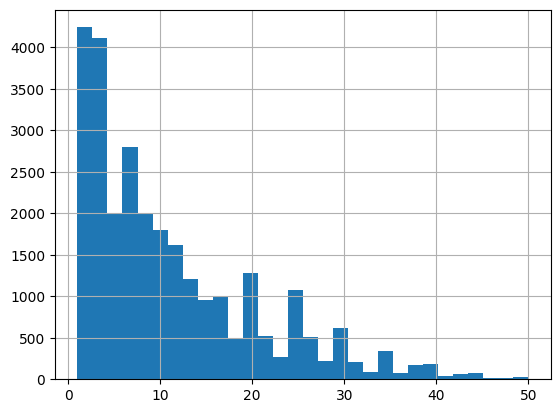

In [33]:
df['YearsCodePro'].hist(bins=30)


In [34]:
def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    elif years <= 3:
        return 'Beginner'
    elif years <= 6:
        return 'Junior'
    elif years <= 15:
        return 'Intermediate'
    else:
        return 'Senior'

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)


In [35]:
# Frequency count
experience_counts = df['ExperienceLevel'].value_counts()
print(experience_counts)


ExperienceLevel
Unknown         9290
Intermediate    8873
Senior          7298
Beginner        6570
Junior          5301
Name: count, dtype: int64


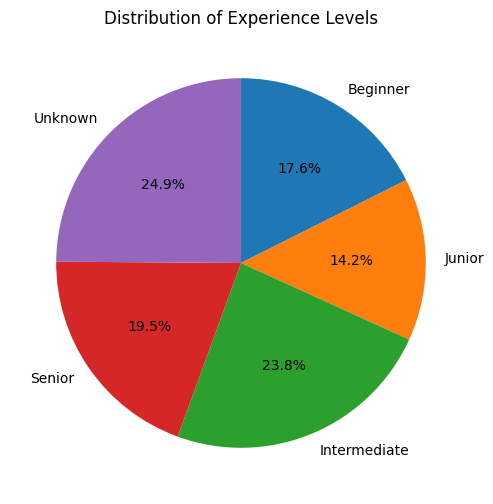

In [36]:
import matplotlib.pyplot as plt

# Define the desired order
experience_order = ['Beginner', 'Junior', 'Intermediate', 'Senior', 'Unknown']

# Get value counts and reorder
experience_counts = df['ExperienceLevel'].value_counts().reindex(experience_order)

# Plot the pie chart
plt.figure(figsize=(8, 6))
experience_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Distribution of Experience Levels')
plt.ylabel('')  # Hide y-axis label
plt.show()


### Feature Engineering: Creating `ExperienceLevel`

To simplify and enhance analysis of professional coding experience, a new column `ExperienceLevel` was derived from `YearsCodePro` using manually defined bins based on observed breaks in the distribution:

| `YearsCodePro` Range | Experience Level |
| -------------------- | ---------------- |
| 0–3 years            | Beginner         |
| 4–6 years            | Junior           |
| 7–15 years           | Intermediate     |
| 16+ years            | Senior           |
| Missing/invalid      | Unknown          |

The resulting `ExperienceLevel` column was visualized with a pie chart, ordered logically from least to most experience, with `Unknown` last.


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
